In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import contextily as ctx

%matplotlib inline

from spineq.data_fetcher import (
    get_uo_sensors,
    get_oa_shapes,
    get_oa_centroids,
    lad20nm_to_lad20cd,
)
from spineq.plotting import plot_optimisation_result, plot_sensors
from spineq.optimise import calc_coverage, calc_oa_weights
from spineq.urb_obs import get_uo_sensor_dict, plot_uo_coverage_grid

In [8]:
lad20nm = "Newcastle upon Tyne"
lad20cd = lad20nm_to_lad20cd(lad20nm)

uo_sensors = get_uo_sensors(lad20cd)
uo_sensors

,name,h_sea,latitude,3rdparty,h_ground,broker,longitude,oa11cd,geometry
id,,,,,,,,,
73086,PER_AIRMON_MESH1757150,45.369999,54.972260,0,2.0,aq_mesh_api,-1.617310,E00042826,POINT (424596.567 564248.757)
73087,PER_AIRMON_MESH1758150,47.189999,54.975755,0,2.0,aq_mesh_api,-1.612715,E00042579,POINT (424888.580 564639.302)
1726,PER_AIRMON_MONITOR914,62.590000,55.006886,0,2.0,aq_mesh_api,-1.619756,E00042735,POINT (424419.171 568101.108)
79515,PER_AIRMON_MESH303245,111.879997,54.991754,0,2.0,aq_mesh_api,-1.710531,E00042257,POINT (418620.224 566389.407)
79158,PER_AIRMON_MESH1915150,107.669998,54.995352,0,2.0,aq_mesh_api,-1.718833,E00042862,POINT (418087.420 566787.639)
...,...,...,...,...,...,...,...,...,...
73228,PER_EMOTE_2604,57.869999,54.975987,0,2.0,Emote Air Quality Sensor,-1.618759,E00042580,POINT (424501.571 564662.997)
73230,PER_EMOTE_2606,59.459999,54.976282,0,2.0,Emote Air Quality Sensor,-1.619008,E00042609,POINT (424485.456 564695.738)
73225,PER_EMOTE_2601,56.810001,54.981944,0,2.0,Emote Air Quality Sensor,-1.616611,E00042580,POINT (424635.463 565326.643)


## Sensor Locations

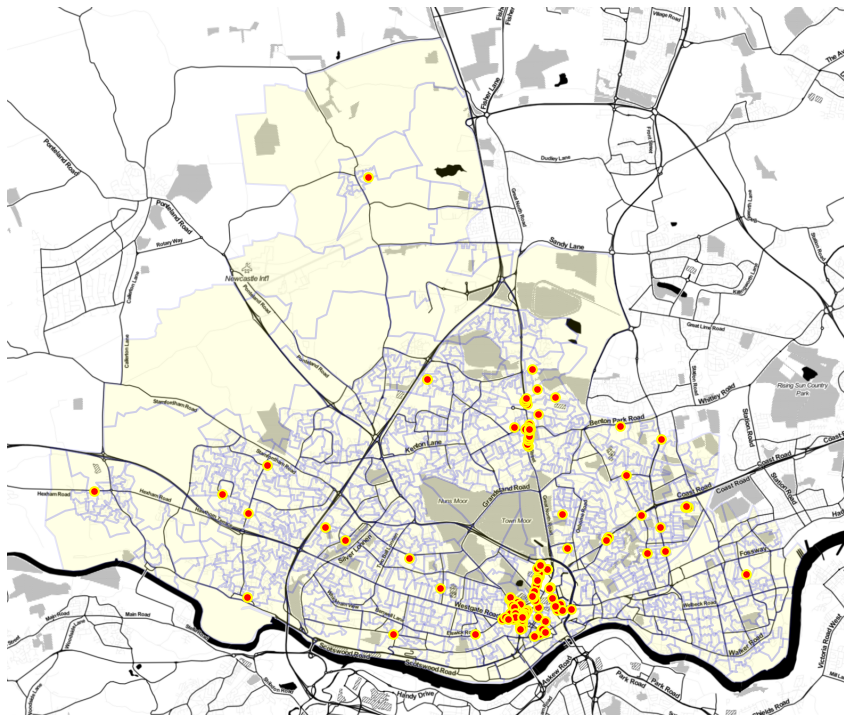

In [9]:
plot_sensors(lad20cd, uo_sensors, centroids=False)

## Coverage Grid

<AxesSubplot:title={'center':'Urban Observatory: 145 sensors in 53 output areas'}>

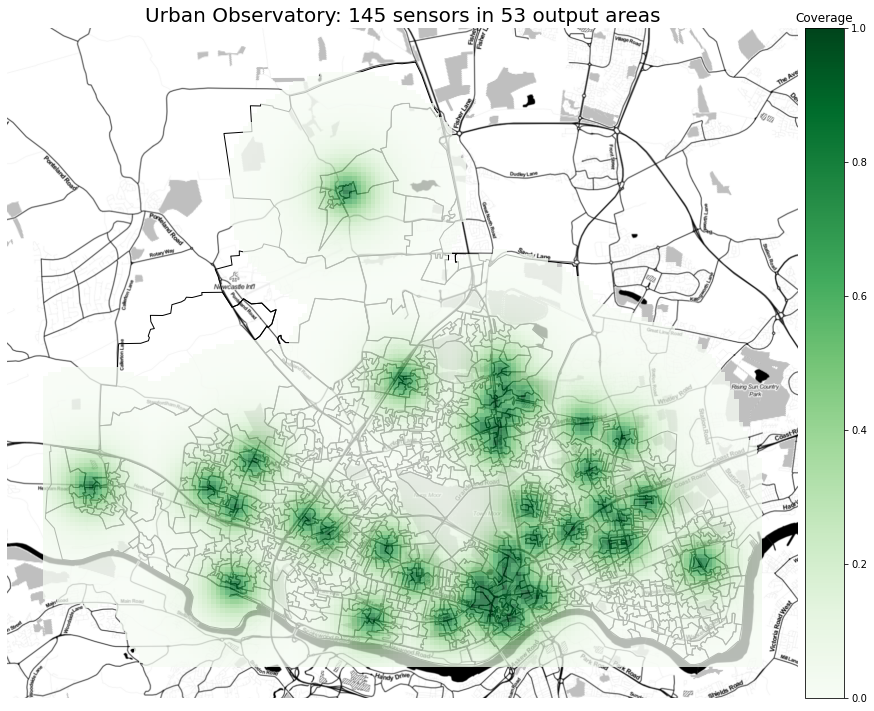

In [10]:
plot_uo_coverage_grid(lad20cd, theta=500)

## Output Area Coverage (snap UO sensors to OA centroids)

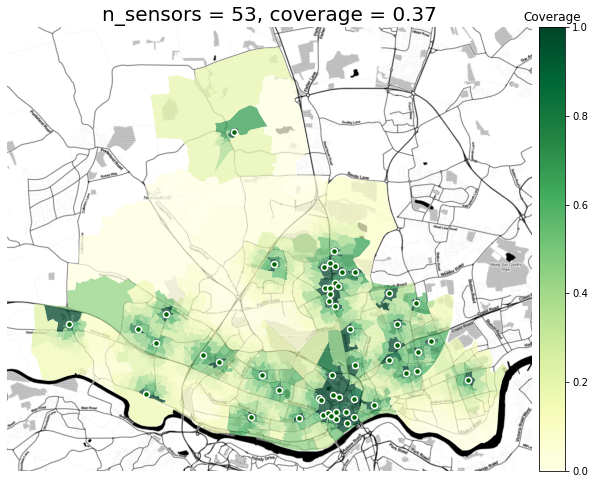

In [11]:
sensor_dict = get_uo_sensor_dict(lad20cd)

oa_weight = calc_oa_weights(
    lad20cd=lad20cd,
    population_weight=1,
    workplace_weight=0,
    pop_age_groups={
        "pop_total": {"min": 0, "max": 90, "weight": 1},
        "pop_children": {"min": 0, "max": 16, "weight": 0},
        "pop_elderly": {"min": 70, "max": 90, "weight": 0},
    },
)
coverage = calc_coverage(lad20cd, sensor_dict, oa_weight=oa_weight, theta=500)

coverage["lad20cd"] = lad20cd
coverage["sensors"] = sensor_dict
plot_optimisation_result(coverage)